<a href="https://colab.research.google.com/github/thamiko1/ML_projects/blob/main/DL_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing and testing dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
labels = ['T-shirt/ top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

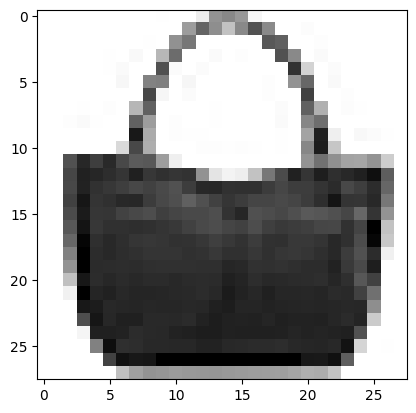

In [ ]:
plt.imshow(train_data[100], cmap=plt.cm.binary)

In [ ]:
labels[train_labels[100]]

'Bag'

In [ ]:
train_data[0].shape

(28, 28)

## Building a model

* Input shape = 28 x 28
* Output shape = 10
* Loss function = tf.keras.losses.CategoricalCrossentropy() for multiclass, binaryCrossentropy() for binary.
  * SparseCategoricalCrossentropy() if not one hot encoded
* Output layer activation = Softmax for multi-class, sigmoid for binary

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['acc'])

model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 18s 6ms/step - loss: 2.4709 - acc: 0.1013 - val_loss: 2.2930 - val_acc: 0.1046
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2864 - acc: 0.1077 - val_loss: 2.2731 - val_acc: 0.1136
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2382 - acc: 0.1399 - val_loss: 2.1003 - val_acc: 0.2290
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.8804 - acc: 0.2330 - val_loss: 1.7314 - val_acc: 0.2349
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6875 - acc: 0.2357 - val_loss: 1.6645 - val_acc: 0.2339
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5884 - acc: 0.2775 - val_loss: 1.5574 - val_acc: 0.3120
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5228 - acc: 0.3076 - val_loss: 1.5090 - val_acc: 0.3160
Epoch 8/10
1875/1875 [==============================] - 6s 3m

## Improve Our Model

Try feature scaling

In [ ]:
train_data = train_data/255
test_data = test_data/255

In [ ]:
train_data[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['acc'])

model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 1.1203 - acc: 0.6017 - val_loss: 0.7926 - val_acc: 0.7171
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7053 - acc: 0.7467 - val_loss: 0.6851 - val_acc: 0.7526
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6467 - acc: 0.7689 - val_loss: 0.6524 - val_acc: 0.7692
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6197 - acc: 0.7817 - val_loss: 0.6415 - val_acc: 0.7727
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6048 - acc: 0.7880 - val_loss: 0.6222 - val_acc: 0.7816
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5952 - acc: 0.7930 - val_loss: 0.6250 - val_acc: 0.7813
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5863 - acc: 0.7961 - val_loss: 0.6114 - val_acc: 0.7880
Epoch 8/10
1875/1875 [==============================] - 6s 3ms

Our model improve from around 0.4 to 0.8 by just normalizing the data

Next, we try to find the ideal learning rate

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['acc'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

lr_history = model.fit(train_data, train_labels, epochs=30, validation_data=(test_data, test_labels),callbacks=[lr_scheduler])

Epoch 1/30
1875/1875 [==============================] - 8s 3ms/step - loss: 1.2259 - acc: 0.5148 - val_loss: 0.9490 - val_acc: 0.6342 - lr: 0.0010
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7940 - acc: 0.6967 - val_loss: 0.7516 - val_acc: 0.7074 - lr: 0.0011
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6868 - acc: 0.7426 - val_loss: 0.6894 - val_acc: 0.7488 - lr: 0.0013
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6412 - acc: 0.7585 - val_loss: 0.6426 - val_acc: 0.7596 - lr: 0.0014
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6018 - acc: 0.7863 - val_loss: 0.6281 - val_acc: 0.7789 - lr: 0.0016
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5816 - acc: 0.7967 - val_loss: 0.6072 - val_acc: 0.7884 - lr: 0.0018
Epoch 7/30
1875/1875 [==============================] - 8s 5ms/step - loss: 0.5655 - acc: 0.8026 - val_loss: 0.5965 - 

Text(0, 0.5, 'Loss')

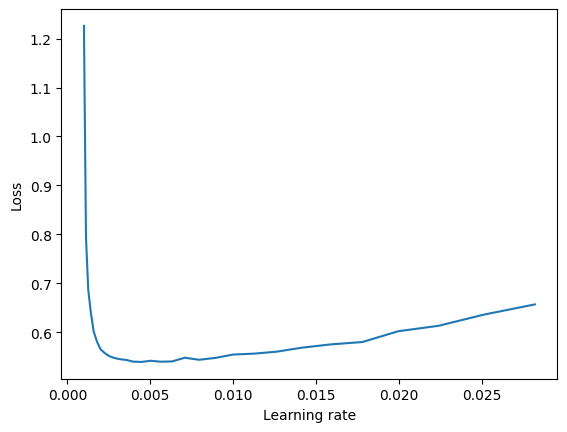

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3*(10**(tf.range(30)/20))
plt.plot(lrs, lr_history.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel('Loss')

Ideal learning rate is the lowest point, then go back a little, I guess 0.002 is good

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.002), metrics=['acc'])

model.fit(train_data, train_labels, epochs=20, validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2311 - acc: 0.4883 - val_loss: 0.8684 - val_acc: 0.6840
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7492 - acc: 0.7295 - val_loss: 0.7356 - val_acc: 0.7412
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6851 - acc: 0.7552 - val_loss: 0.7013 - val_acc: 0.7497
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6586 - acc: 0.7616 - val_loss: 0.6864 - val_acc: 0.7562
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6350 - acc: 0.7698 - val_loss: 0.6676 - val_acc: 0.7663
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6141 - acc: 0.7790 - val_loss: 0.6360 - val_acc: 0.7710
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5945 - acc: 0.7877 - val_loss: 0.6170 - val_acc: 0.7766
Epoch 8/20
1875/1875 [==============================] - 6s 3ms

Prediction

In [ ]:
y_probs = model.predict(test_data)

313/313 [==============================] - 0s 2ms/step


In [ ]:
y_probs[0]

array([4.2997307e-15, 2.1163674e-12, 5.5430819e-14, 1.7431316e-09,
       8.2386992e-10, 3.4458384e-02, 9.1806051e-12, 1.7546423e-01,
       8.2990819e-06, 7.9006910e-01], dtype=float32)

In [ ]:
y_preds = y_probs.argmax(axis=1)

In [ ]:
y_preds

array([9, 2, 1, ..., 6, 1, 5])

Print confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels, y_pred=y_preds)

array([[747,   0,   4,  91,   1,   0, 140,   0,  17,   0],
       [  4, 916,   1,  60,   4,   0,  15,   0,   0,   0],
       [ 26,   0, 570,  13, 155,   0, 230,   0,   6,   0],
       [ 47,   6,   0, 839,  35,   2,  65,   1,   5,   0],
       [  0,   0,  86,  31, 746,   2, 126,   0,   9,   0],
       [  0,   0,   0,  10,   1, 910,   0,  33,   7,  39],
       [175,   1,  77,  60, 121,   0, 548,   0,  18,   0],
       [  0,   0,   0,   0,   0,  46,   0, 896,   0,  58],
       [  0,   1,   1,  12,  10,   8,  37,   3, 924,   4],
       [  0,   0,   0,   0,   0,  20,   0,  38,   4, 938]])

## Visual some predictions

In [ ]:
import random

def plot_random(model, images, true_labels, classes):

  i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

1/1 [==============================] - 0s 17ms/step


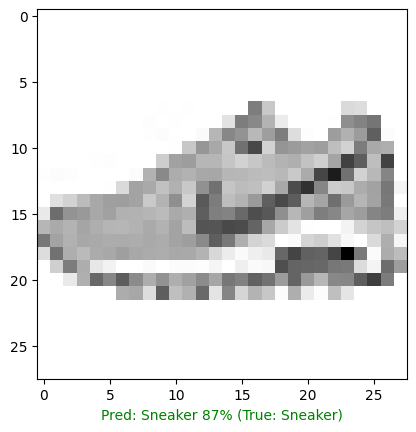

In [ ]:
plot_random(model=model,
                  images=test_data,
                  true_labels=test_labels,
                  classes=labels)